# Test of Piecewise Smooth Quadratic Estimators

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import interval as ival
import psl_under as pl
import psqe_under as pq

Auxiliary plot routine

In [2]:
def plot_problem(flist, minlist, a, b):
    colors = ['r-', 'b-', 'g-', 'y-']
    step = (b-a)/1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)
    
    fta = np.empty([num_funcs, num_points])
    print(fta)
    
    for i in range(num_funcs):
        for j in range(num_points):
            fta[i,j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i,:], colors[i])
    for point in min_list:
        plt.scatter(point[0], point[1], s=20)
    plt.ylim([lb - d,ub + d])
    plt.show() 

Test problem

In [3]:
x = sym.symbols('x')
e_f = x**4 + 1
e_df = sym.diff(e_f)
e_ddf = sym.diff(e_df)
print(e_f, e_df, e_ddf)
f = sym.lambdify(x, e_f)
df = sym.lambdify(x, e_df)
ddf = sym.lambdify(x, e_ddf)
print(f(2.), df(2.))
a = -1.
b = 2.
idef = ival.Interval([a,b])
di = df(idef)

# print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
print(di, ddi)

x**4 + 1 4*x**3 12*x**2
17.0 32.0
[-4.0, 32.0] [0, 48.0]


In [4]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
L = max(abs(ddi.x[0]), abs(ddi.x[1]))
# print(L)
estim_pl = pl.PSL_Under(a, b, di.x[0], di.x[1], f)
estim_int = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
estim_lip = pq.PSQE_Under(a, b, -L, L, f, df)
print(estim_pl)
print(estim_int)
print(estim_lip)
print(estim_lip.lower_bound_and_point())
min_list = [estim_pl.lower_bound_and_point(),estim_int.lower_bound_and_point(), estim_lip.lower_bound_and_point()]
print(min_list)

Piecewise linear estimator a = -1.0, b = 2.0, c = 1.25, alp = -4.0, bet = 32.0, fa = 2.0, fb = 17.0
Estimator a = -1.0, b = 2.0, c = 0.875, d = 1.625, alp = 0, bet = 48.0, fa = 2.0, fb = 17.0, dfa = -4.0, dfb = 32.0
Estimator a = -1.0, b = 2.0, c = -0.2875, d = 1.5875, alp = -48.0, bet = 48.0, fa = 2.0, fb = 17.0, dfa = -4.0, dfb = 32.0
(0.5083333333333333, -28.23416666666667)
[(1.25, -7.0), (0.9583333333333334, -5.666666666666667), (0.5083333333333333, -28.23416666666667)]


Vizualize test problem

[[6.90210972e-310 6.90210972e-310 2.32136941e-316 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


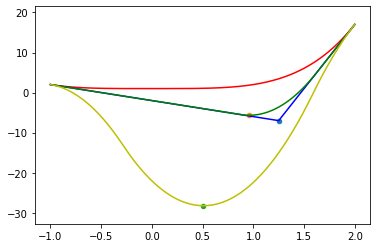

In [5]:
plot_problem([f,estim_pl.estimator,estim_int.estimator, estim_lip.estimator], min_list, a, b)